# Computations in big mapping class groups

~~Q: What can you compute in a mapping class group?~~

Q: What can you compute in a **big** mapping class group?

Q: What can you **actually** compute in a big mapping class group?

A: Lots, but not everything

## Bigger

Bigger is a program for computing big mapping classes and their actions on non-compact laminations via ideal triangulation coordinates.

* ReadTheDocs http://biggermcg.readthedocs.io
* PyPI https://pypi.org/project/bigger
* Source: https://github.com/MarkCBell/bigger

Get bigger by running:

    $ pip install bigger

Follow along at home right now at: https://mybinder.org/v2/gh/markcbell/demos/master?filepath=gato-2020-10-29.ipynb

# Surfaces

In [1]:
import bigger

In [2]:
S = bigger.load.biflute()

<img src="figures/biflute.svg" alt="biflute" style="width: 800px;"/>

In [ ]:
S.draw(range(30))

In [ ]:
S.draw(range(30), layout=S, label='edge', w=1650, h=150)

Let's make a quick drawing function to save us constantly writing these default options

In [3]:
draw = bigger.draw(edges=range(30), layout=S, label='weight', w=1650, h=150)

In [ ]:
draw(S)

# Laminations

In [ ]:
a1 = S.triangulation({4:1, 5:1})
a1

In [ ]:
draw(a1)

In [ ]:
b1 = S.triangulation({1:1, 2:1, 3:2, 4:2, 6:2, 7:1, 8:1})
b1

In [ ]:
draw(b1)

In [ ]:
L = S.triangulation(lambda n: 2)
L

In [ ]:
draw(L)

In [ ]:
draw(S.triangulation(lambda n: 4 if 7 < n < 14 else 2 if n > 2 else -1))

In [ ]:
draw(S.triangulation(lambda n: 2*abs(n)))

In [ ]:
horizontal = S.triangulation(lambda n: 1 if n % 3 != 2 else 0)
draw(horizontal)

In [ ]:
draw(horizontal + 3 * L)

# Mapping Classes

In [ ]:
draw(a1)

We can form a Dehn twist about the curve `a1`

In [ ]:
T_a1 = a1.twist()

In [ ]:
print(horizontal)
draw(horizontal)

In [ ]:
print(T_a1(horizontal))
draw(T_a1(horizontal))

In [ ]:
draw((T_a1**10)(horizontal))

In [ ]:
print(S('a_1')(horizontal))
draw(S('a_1')(horizontal))

In [ ]:
draw(S('a_1.a_5')(horizontal))

In [ ]:
draw((S('a_1.a_5')**-3)(horizontal))

In [ ]:
draw((S('a[4]')**-3)(horizontal))

In [ ]:
draw((S('a')**2)(horizontal))

In [ ]:
draw((S('a{n > 1 and n % 2 == 0}')**-3)(horizontal))

In [ ]:
draw(S('a{n > 1 and all(n % i for i in range(2,n))}')(horizontal), edges=range(60))

`draw(S('a{the nth digit of pi is 0}')(horizontal))`

However this means that there are some mapping classes which are uncomputable:

`draw(S('a{the nth digit of Chaitin's constant is 0}')(horizontal))`

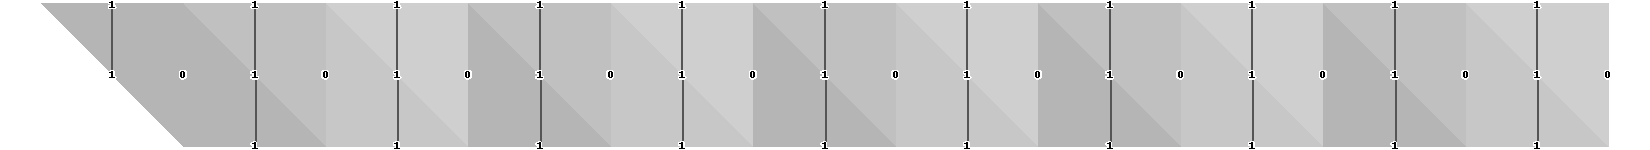

In [4]:
vertical = S.triangulation(lambda n: 1 if n % 3 != 0 else 0)
draw(vertical)

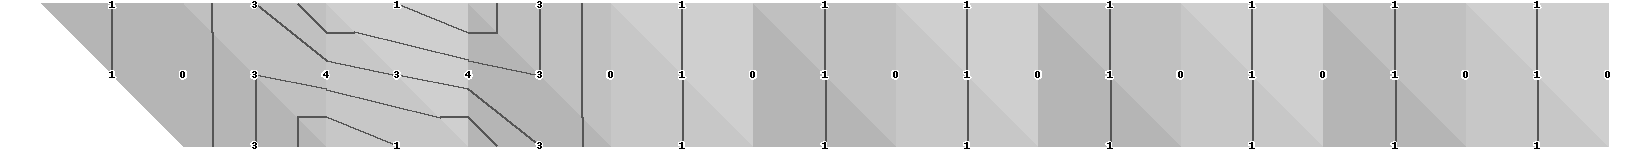

In [5]:
draw(S('b_1')(vertical))

In [ ]:
draw(S('a.a.a.b_1')(a1))

In [ ]:
draw(S('s.s.a.a.a.b_1')(a1))

# Cantor sphere

In [ ]:
C = bigger.load.cantor()

<img src="https://biggermcg.readthedocs.io/en/latest/_images/cantor.svg" alt="Cantor"/>

In [ ]:
draw_northern = bigger.draw(edges=[(i, +1) for i in range(9)], label='weight')

In [ ]:
draw_northern(C)

In [ ]:
L = C.triangulation.as_lamination()
draw_northern(L)

In [ ]:
draw_northern(C('a_2.b_13')(L))

# Computability

Let T be a **computable** (ideal, labelled) triangulation of S, that is one where
`e → link(e) = (a, b, c, d)`
is a computable function.


### Definition

- A measured lamination L on S is **T-computable** if i → µ<sub>L</sub>(e<sub>i</sub>) is a computable function.
- A mapping class h ∈ MCG(S) is **T-computable** if for every T-computable lamination L, h(L) is T-computable and L → h(L) is a computable function.


Note: These definitions depend on the choice of T. Whether a particular lamination or mapping class is computable may vary with the choice of T

<img src="figures/surface.svg" alt="Cantor" style="width: 800px;"/>

<img src="figures/surface.svg" alt="Cantor" style="width: 800px;"/>

| Computable | Top | Bottom |
|-|-----|-----|
| Triangulation | <span style="color:green">&#x2714;</span> | <span style="color:green">&#x2714;</span> |
| Curve | <span style="color:green">&#x2714;</span> | <span style="color:green">&#x2714;</span> |
| Dehn twist | <span style="color:red">*&#x2718;*</span> | <span style="color:green">&#x2714;</span> |


### Nielsen Realisation Theorem (Afton–Calegari–Chen–Lyman)

If H < MCG(S) is a finite subgroup then it can be realised as a group of isometries of some hyperbolic metric on S.

### Theorem (B.)

If H < MCG(S) is a finite subgroup of T-computable mapping classes then a group of isometries of a hyperbolic metric on S realising it is computable

Proof: Same argument as for finite type surfaces (described and implemented at http://periodic.herokuapp.com/)

# To do

Implement blooming Cantor tree